In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


data = pd.read_csv('merge8.csv')

train_data = data[data['year'] < 2021]
test_data = data[data['year'] == 2021]


features = ['year', 'round', 'weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy', 'cum_wins', 'grid', 'driver_age', 'home_race', 'points_before_race']
target = 'in_top_ten'

X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values
y_test = test_data[target].values

# NN definition
def create_model(neurons=64, dropout_rate=0.2, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# parameter grid for GridSearchCV
param_grid = {
    'neurons': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3],
    'activation': ['relu', 'tanh','linear']
}

# GridSearchCV 
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_result = grid.fit(X_train, y_train)

best_params = grid_result.best_params_
best_score = grid_result.best_score_

print(f'Best score: {best_score}')
print(f'Best parameters: {best_params}')


model = create_model(neurons=best_params['neurons'], dropout_rate=best_params['dropout_rate'], activation=best_params['activation'])
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_rounded)
cm = confusion_matrix(y_test, y_pred_rounded)
report = classification_report(y_test, y_pred_rounded)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)

C:\Users\Akhil Jayadeep\AppData\Local\Temp\ipykernel_28700\933162161.py:45: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)


Best score: 0.6991291642189026
Best parameters: {'activation': 'linear', 'dropout_rate': 0.2, 'neurons': 64}
14/14 [==============================] - 0s 1ms/step
Accuracy: 0.77
Confusion Matrix:
[[149  71]
 [ 29 191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       220
           1       0.73      0.87      0.79       220

    accuracy                           0.77       440
   macro avg       0.78      0.77      0.77       440
weighted avg       0.78      0.77      0.77       440



<AxesSubplot: >

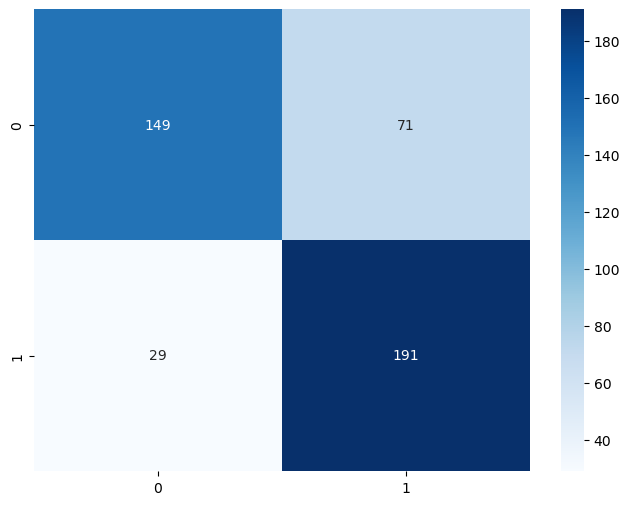

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', ax=ax)